In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [21]:
import numpy as np

complex_matrix = np.random.random((6, 6)) + np.random.random((6, 6)) * 1j
print(complex_matrix)



[[0.29450039+0.99081415j 0.9881682 +0.67645784j 0.97908998+0.21556734j
  0.48001715+0.10149116j 0.48152245+0.65937671j 0.20158534+0.81179555j]
 [0.46919216+0.15915272j 0.0599733 +0.52862618j 0.74650316+0.01702183j
  0.25102196+0.01862985j 0.97309361+0.2697518j  0.3032096 +0.18731709j]
 [0.64298722+0.46088619j 0.7122848 +0.53682173j 0.92549684+0.60968565j
  0.22329607+0.80860335j 0.59279744+0.82822655j 0.16838409+0.79375278j]
 [0.03100512+0.26716443j 0.1338617 +0.17293787j 0.28461578+0.51410734j
  0.55382025+0.261621j   0.91008668+0.30056278j 0.57857871+0.44809847j]
 [0.68041147+0.40451792j 0.63226393+0.21625692j 0.63986534+0.79829612j
  0.48777988+0.14799267j 0.9844715 +0.47665798j 0.0060338 +0.0585709j ]
 [0.79093867+0.76976787j 0.63712839+0.68137776j 0.22218516+0.44817714j
  0.31629341+0.08481506j 0.83558194+0.52299525j 0.4905989 +0.31105752j]]


In [61]:
def reconstruct_fft(data: np.ndarray, threshold: float = 0.0):
    fft2 = np.fft.fft2(data)
    x = np.arange(0, data.shape[1])
    y = np.arange(0, data.shape[0])
    freqs_x = np.fft.fftfreq(len(x), 1 / len(x))
    freqs_y = np.fft.fftfreq(len(y), 1 / len(y))
    recomb = np.zeros_like(data, dtype=np.complex128)
    
    for i in range(len(freqs_y)):
        for j in range(len(freqs_x)):
            # if abs(fft2[i, j]) / (len(x) * len(y)) > threshold:
            sinewave = (
                1 
                / (len(x) * len(y))
                * (
                    fft2[i, j].real 
                    * np.cos(freqs_y[i] * 2 * np.pi * y[:, np.newaxis])
                    * np.cos(freqs_x[j] * 2 * np.pi * x[np.newaxis, :])
                    - fft2[i, j].imag 
                    * np.sin(freqs_y[i] * 2 * np.pi * y[:, np.newaxis])
                    * np.sin(freqs_x[j] * 2 * np.pi * x[np.newaxis, :])
                )
            )
            recomb += sinewave
    
    # plt.imshow(np.abs(recomb), cmap='gray')
    # plt.show()
    
    return recomb


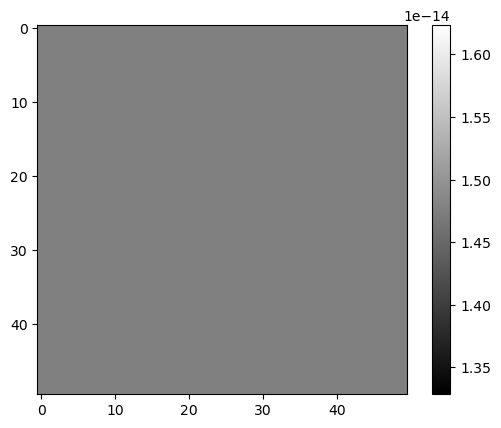

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruct_fft(data: np.ndarray, threshold: float = 0.0):
    fft2 = np.fft.fft2(data)
    x = np.arange(0, data.shape[1])
    y = np.arange(0, data.shape[0])
    freqs_x = np.fft.fftfreq(len(x), 1 / len(x))
    freqs_y = np.fft.fftfreq(len(y), 1 / len(y))
    recomb = np.zeros_like(data, dtype=np.complex128)
    
    for i in range(len(freqs_y)):
        for j in range(len(freqs_x)):
            if abs(fft2[i, j]) / (len(x) * len(y)) > threshold:
                sinewave = (
                    1 
                    / (len(x) * len(y))
                    * (
                        fft2[i, j].real 
                        * np.cos(freqs_y[i] * 2 * np.pi * y[:, np.newaxis])
                        * np.cos(freqs_x[j] * 2 * np.pi * x[np.newaxis, :])
                        - fft2[i, j].imag 
                        * np.sin(freqs_y[i] * 2 * np.pi * y[:, np.newaxis])
                        * np.sin(freqs_x[j] * 2 * np.pi * x[np.newaxis, :])
                    )
                )
                recomb += sinewave
    
    return recomb

# Example usage
# Assuming you have a 2D array called 'z' representing the surface
reconstructed_surface = reconstruct_fft(z)

# Plot the reconstructed surface
plt.imshow(np.real(reconstructed_surface), cmap='gray')
plt.colorbar()
plt.show()


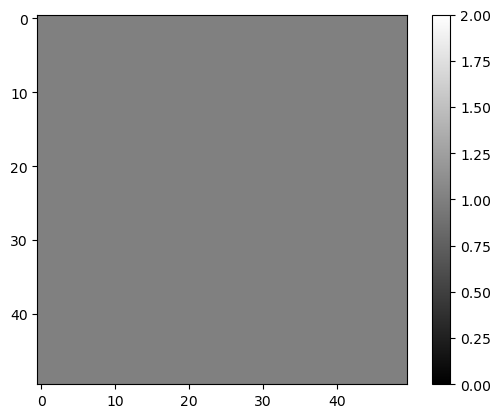

In [98]:
# gaussian surface
x = np.linspace(0,2*np.pi,50)
y = np.linspace(0,2*np.pi,50)
x,y = np.meshgrid(x,y)
z = np.ones_like(x)
# z = z + np.random.normal(0,0.3,z.shape)
plt.imshow(z, cmap='gray')
plt.colorbar()
plt.clim([0,2])


# add some noise
# # z += np.random.normal(0,0.1,z.shape)
# # plt.imshow(z, cmap='gray')

# recomb = reconstruct_fft(z, threshold=0)
# plt.imshow(np.abs(recomb), cmap='gray')
# plt.colorbar()


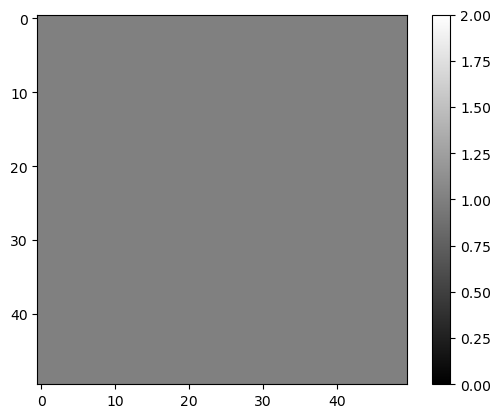

In [99]:
freqdomain = np.fft.fft2(z)
for n in range (0,50):
    for m in range (0,50):
        if np.linalg.norm(freqdomain[n,m]) < 10:
            (freqdomain[n,m]) = 0

recomb = np.fft.ifft2(freqdomain)
plt.imshow(np.abs(recomb), cmap='gray')
plt.colorbar()
plt.clim([0,2])

In [100]:
eigenvalues, eigenvectors = np.linalg.eig(freqdomain)
print(eigenvalues)

[2500.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j
    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j
    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j
    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j
    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j
    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j
    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j
    0.+0.j]


In [102]:
r = np.fft.ifft(eigenvalues)
r

array([50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j,
       50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j,
       50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j,
       50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j,
       50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j,
       50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j,
       50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j, 50.+0.j,
       50.+0.j])

(0.0, 100.0, 0.0, 100.0)

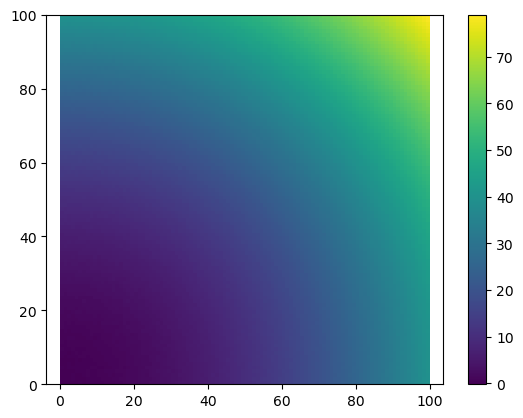

In [59]:
plt.pcolormesh(z)
plt.colorbar()
plt.axis('equal')

In [56]:
eigenvalues, eigenvectors = np.linalg.eig(np.fft.fft2(z))
eigenvalues

array([ 2.00121893e+04+1.42108547e-14j,  7.77094712e+01-7.56545318e+01j,
        7.77094712e+01+7.56545318e+01j, -9.37135162e+01-4.13970376e+01j,
       -6.45373112e+01-8.06910862e+01j, -9.37135162e+01+4.13970376e+01j,
       -6.45373112e+01+8.06910862e+01j, -3.19684400e+01+9.52105694e+01j,
       -3.19684400e+01-9.52105694e+01j, -9.00296402e+01-1.18871087e+01j,
       -9.00296402e+01+1.18871087e+01j, -9.66978905e+00+9.34585678e+01j,
       -9.66978905e+00-9.34585678e+01j,  9.35594954e+01+2.75927912e+00j,
        9.35594954e+01-2.75927912e+00j,  4.48675512e+01-7.80036116e+01j,
        6.54018825e+01+5.88600538e+01j,  4.48675512e+01+7.80036116e+01j,
        6.54018825e+01-5.88600538e+01j,  7.96197130e+01+3.18614615e+01j,
        7.96197130e+01-3.18614615e+01j,  7.65101863e+01+3.68366383e+01j,
        7.65101863e+01-3.68366383e+01j,  1.97596271e+01+8.72998364e+01j,
        8.36538068e+01+1.51705854e+01j,  8.36538068e+01-1.51705854e+01j,
        1.97596271e+01-8.72998364e+01j, -7.14882124

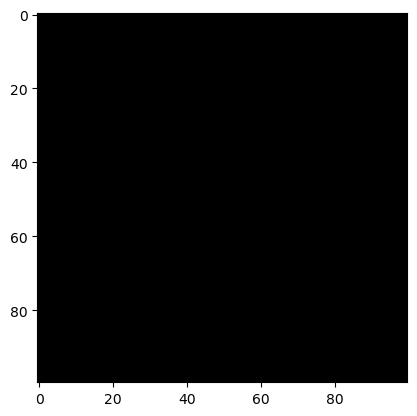

array([[0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j, ...,
        0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j],
       [0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j, ...,
        0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j],
       [0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j, ...,
        0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j],
       ...,
       [0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j, ...,
        0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j],
       [0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j, ...,
        0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j],
       [0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j, ...,
        0.02730824+0.j, 0.02730824+0.j, 0.02730824+0.j]])

In [35]:
recomb = reconstruct_fft(z, threshold=0)
recomb